In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster import vq

In [3]:
from scipy.io import arff
data, meta = arff.loadarff('BreastCancerData.arff')

In [ ]:
print(data.shape)
print(data)

In [28]:
Test = np.matrix(list(zip(data['age'],data['tumor-size'])))
print(Test.shape)

(683, 2)


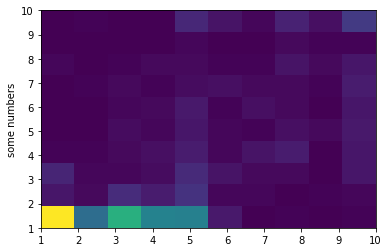

In [16]:
import matplotlib.pyplot as plt
plt.hist2d(data['age'], data['tumor-size'])
plt.ylabel('some numbers')
plt.show()

frequency = np.zeros((1,10), dtype=int)
print(frequency.size)

for n in data['age']:
    for j in range(10):
        if (j+1) == n:
            frequency[j] += 1
    
print(frequency)

In [17]:
coop = KMeans(n_clusters=2).fit_predict(Test)

centroids, variance = vq.kmeans(Test,2)
print(centroids)

[[ 7.59259259  6.95833333]
 [ 2.98501071  1.48394004]]


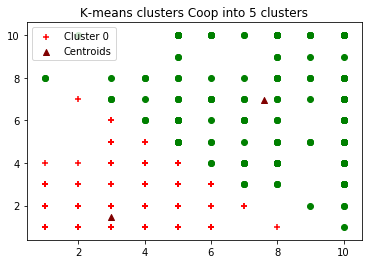

In [18]:
import pylab as pl

for i in range(0, Test.shape[0]):
    if coop[i] == 0:
        c1 = pl.scatter(Test[i,0],Test[i,1],c='r',marker='+')
    elif coop[i] == 1:
        c2 = pl.scatter(Test[i,0],Test[i,1],c='g',marker='o')
    #elif coop[i] == 2:
        #c3 = pl.hist2d(Test[i,0],Test[i,1],c='b',marker='*')
    #elif coop[i] == 3:
        #c4 = pl.hist2d(Test[i,0],Test[i,1],c='#22222f',marker='.')
    #elif coop[i] == 4:
        #c5 = pl.hist2d(Test[i,0],Test[i,1],c='#daa520',marker='>')
c6 = pl.scatter(centroids[:,0], centroids[:,1], c='#800000', marker='^')
pl.legend([c1, c6],['Cluster 0',
    'Centroids'])
pl.title('K-means clusters Coop into 5 clusters')
pl.show()


[[ 7.335       7.295     ]
 [ 2.85714286  1.40786749]]


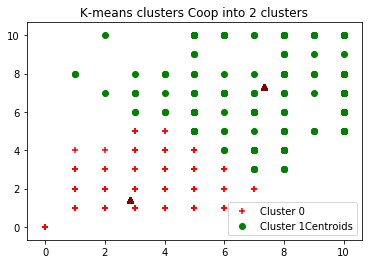

In [31]:
newTest = Test.copy()

for i in range(0, newTest.shape[0]):
    if newTest[i,0] - newTest[i,1]>5:
            #if newTest[i,0]<7:
                newTest[i,0] = 0
                newTest[i,1] = 0

coop = KMeans(n_clusters=2).fit_predict(newTest)

centroids, variance = vq.kmeans(newTest,2)
print(centroids)

for i in range(0, newTest.shape[0]):
    if coop[i] == 0:
        c1 = pl.scatter(newTest[i,0],newTest[i,1],c='r',marker='+')
    elif coop[i] == 1:
        c2 = pl.scatter(newTest[i,0],newTest[i,1],c='g',marker='o')

        c6 = pl.scatter(centroids[:,0], centroids[:,1], c='#800000', marker='^')
pl.legend([c1, c2, c6],['Cluster 0', 'Cluster 1'
    'Centroids'])
pl.title('K-means clusters Coop into 2 clusters')
pl.show()
